In [2]:
import numpy as np
import pandas as pd
from numpy import arange
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

In [112]:
# nflx = pd.read_csv('NFLX.csv',index_col='Date')
aapl = pd.read_csv('AAPL.csv')

In [113]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466089,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400


In [5]:
acb = pd.read_csv('ACB.csv')

In [6]:
acb.head()

,Ticker,DTYYYYMMDD,Volume,Open,High,Low,Close
0,ACB,9/14/2014,56048,9.706,9.706,9.220,9.366
1,ACB,9/15/2014,461982,9.220,9.366,9.220,9.366
2,ACB,9/16/2014,709045,9.463,9.997,9.414,9.657
3,ACB,9/17/2014,480321,9.657,9.657,9.414,9.463
4,ACB,9/18/2014,253451,9.463,9.463,9.366,9.414


In [9]:
data = aapl.copy()

In [10]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03
mean,64.504673,65.216011,63.825824,64.548227,62.514214,1.957608e+08
std,52.863071,53.500442,52.273165,52.912557,53.424651,1.701828e+08
min,13.856071,14.271429,13.753571,13.947500,12.013333,3.145820e+07
25%,24.608126,24.825536,24.349999,24.576875,22.221228,8.954132e+07
50%,39.628750,39.995001,39.173750,39.472500,37.560289,1.338140e+08
75%,115.332499,116.675001,113.652502,115.207499,113.282372,2.372651e+08
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.506120e+09


In [11]:
data.corr(method='pearson')

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999886,0.999862,0.999712,0.999672,-0.476476
High,0.999886,1.000000,0.999833,0.999862,0.999822,-0.475089
Low,0.999862,0.999833,1.000000,0.999867,0.999834,-0.478588
Close,0.999712,0.999862,0.999867,1.000000,0.999960,-0.477010
Adj Close,0.999672,0.999822,0.999834,0.999960,1.000000,-0.479071
Volume,-0.476476,-0.475089,-0.478588,-0.477010,-0.479071,1.000000


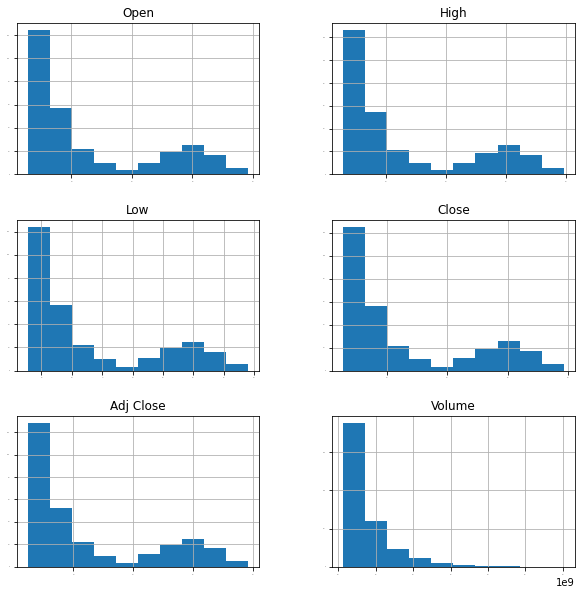

In [13]:
data.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1,figsize=(10, 10))
plt.show()

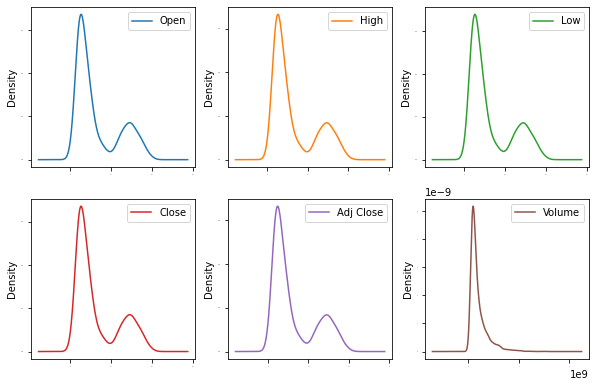

In [16]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True, fontsize=1, figsize=(10, 10))
plt.show()

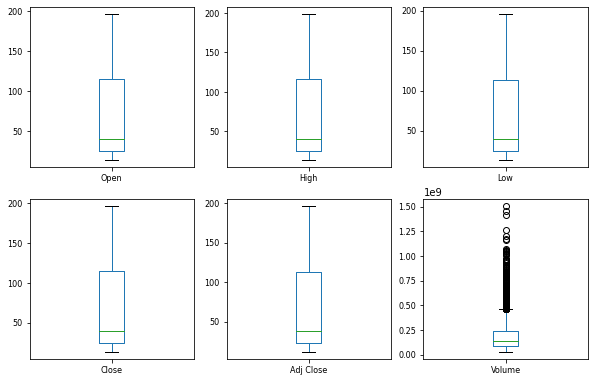

In [18]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=8,figsize=(10,10))
pyplot.show()

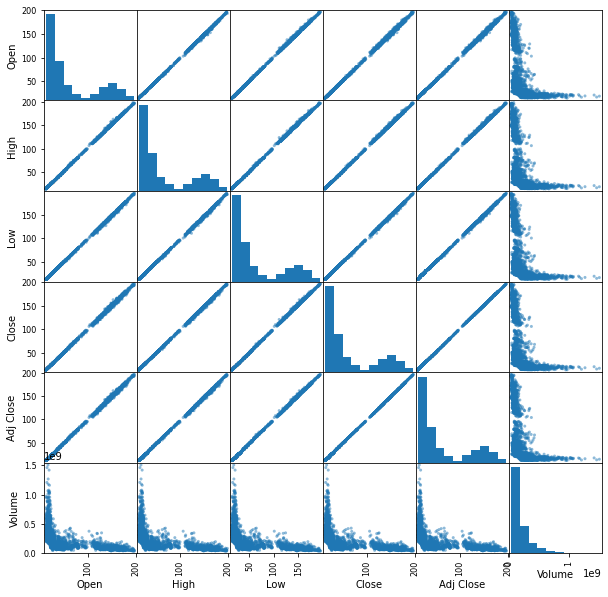

In [21]:
scatter_matrix(data,figsize=(10, 10))
plt.show()

In [23]:
# Split data
split_date = '2019-12-31'
X_1 = data[data['Date'] < split_date]

In [24]:
X_1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466089,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400
...,...,...,...,...,...,...,...
2006,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.261597,98572000
2007,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327461,48478800
2008,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702927,93121200
2009,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676102,146266000


In [25]:
def inc_dec(c, o): # input là chỉ số close và open của từng ngày và output là kết quả so sánh hai giá trị: Increase, Decrease hay Equal
    if c > o:
        value="Increase"
    elif c < o:
        value="Decrease"
    else:
        value="Equal"
    return value

In [26]:
# Add status column into dataset
data["Status"]=[inc_dec(c,o) for c, o in zip(data.Close,data.Open)]

In [27]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Status
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.466089,302220800,Increase
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.533087,260022000,Increase
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.672230,271269600,Increase
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.804705,318292800,Increase
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.784389,394024400,Decrease


In [84]:
X_train=X_1[['Open','High','Low']]
y_train = X_1[['Close']]

In [85]:
X_train.shape

(2011, 3)

In [86]:
y_train.shape

(2011, 1)

In [88]:
X_2 = data[data['Date'] >= split_date]
X_2

,Date,Open,High,Low,Close,Adj Close,Volume,Status
2011,2019-12-31,72.482498,73.419998,72.379997,73.412498,71.615036,100805600,Increase
2012,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249008,135480400,Increase
2013,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536888,146322800,Increase
2014,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200,Increase
2015,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771027,108872000,Decrease
...,...,...,...,...,...,...,...,...
2923,2023-08-16,177.130005,178.539993,176.500000,176.570007,176.570007,46964900,Decrease
2924,2023-08-17,177.139999,177.509995,173.479996,174.000000,174.000000,66062900,Decrease
2925,2023-08-18,172.300003,175.100006,171.960007,174.490005,174.490005,61114200,Increase
2926,2023-08-21,175.070007,176.130005,173.740005,175.839996,175.839996,46311900,Increase


In [89]:
X_test=X_2[['Open','High','Low']]
y_test = X_2[['Date','Close']]

In [90]:
print(X_test.shape)
print(y_test.shape)

(917, 3)
(917, 2)


In [91]:
y_test.set_index("Date",inplace=True)

In [92]:
y_test

,Close
Date,
2019-12-31,73.412498
2020-01-02,75.087502
2020-01-03,74.357498
2020-01-06,74.949997
2020-01-07,74.597504
...,...
2023-08-16,176.570007
2023-08-17,174.000000
2023-08-18,174.490005


In [93]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [106]:
from sklearn.metrics import mean_squared_error

predict_price = model.predict(X_test)
score = mean_squared_error(y_test,predict_price)

In [107]:
score

0.9625995799144537

In [109]:
# Convert np array into pd frame:
predict_price = pd.DataFrame(predict_price,index=y_test.index,columns = ['Price'])

In [110]:
predict_price

,Price
Date,
2019-12-31,73.162694
2020-01-02,74.739664
2020-01-03,74.858032
2020-01-06,74.490819
2020-01-07,74.728707
...,...
2023-08-16,177.804549
2023-08-17,174.657092
2023-08-18,174.307768


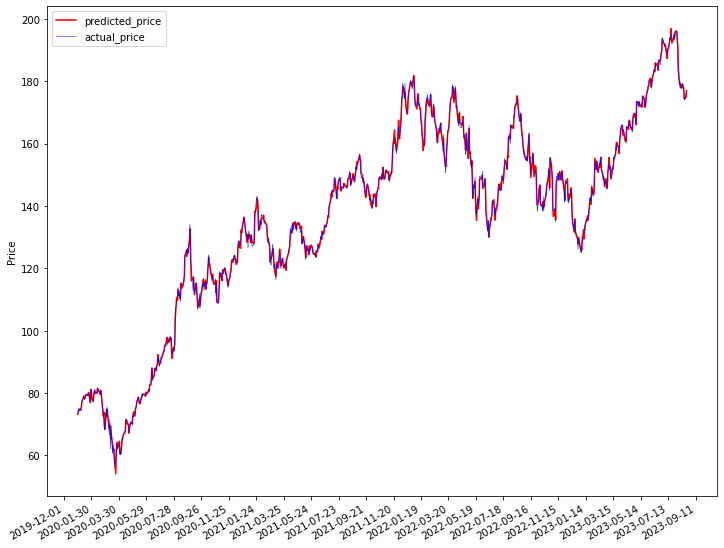

In [121]:
import matplotlib.dates as mdates
import datetime as dt

plt.figure(figsize=(12,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
x_dates = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in predict_price.index.values]
plt.plot(x_dates, predict_price,'r')
plt.plot(x_dates, y_test,'b',linewidth=.5)
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Price") 
plt.gcf().autofmt_xdate()
plt.show()

In [104]:
r2_score = model.score(X_test,y_test)*100
print(float("{0:.2f}".format(r2_score)))

99.91
